# Abstract:

### Understanding the tastes of each user and the characteristics of each product is necessary to predict how a user will respond to a new product. This latent user and product dimensions can be discovered with the help of user feedback. A numeric rating and its accompanying text review is the most widely available form of user feedback. A measure which encapsulates the contents of such reviews is often necessary as they have been found to significantly influence the shopping behaviour of users. A fine-grained form of such measure that could act as perfect feedback about the product is a star rating. The review rating prediction tries to predict a rating corresponding to the given review.

# Problem Statement:

### Given the google rating data, use a hierarchical clustering algorithm to cluster reviews.

# Data Information:


### This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and the average user rating per category is calculated.


### Input variables:

### User= Unique user id 
### Attribute 1 =Average ratings on churches
### Attribute 2= Average ratings on resorts
### Attribute 3= Average ratings on beaches
### Attribute 4= Average ratings on parks 
### Attribute 5= Average ratings on theatres 
### Attribute 6 =Average ratings on museums
### Attribute 7 =Average ratings on malls
### Attribute 8 =Average ratings on zoo
### Attribute 9= Average ratings on restaurants
### Attribute 10= Average ratings on pubs/bars 
### Attribute 11= Average ratings on local services
### Attribute 12= Average ratings on burger/pizza shops
### Attribute 13= Average ratings on hotels/other lodgings 
### Attribute 14= Average ratings on juice bars 
### Attribute 15= Average ratings on art galleries
### Attribute 16= Average ratings on dance clubs
### Attribute 17 =Average ratings on swimming pools 
### Attribute 18 =Average ratings on gyms
### Attribute 19 =Average ratings on bakeries
### Attribute 20= Average ratings on beauty & spas 
### Attribute 21= Average ratings on cafes 
### Attribute 22= Average ratings on viewpoints 
### Attribute 23= Average ratings on monuments 
### Attribute 24= Average ratings on gardens

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5456)
pd.set_option('display.max_columns', 26)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("google_review_ratings.csv") # loading the dataset

In [3]:
df.head()# reading the first five rows from dataset

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df.columns # reading all the columns from dataset

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'], dtype='object')

In [5]:
# renaming the columns in dataset

In [6]:
df1 = df.rename(columns = {'Category 1': 'Average ratings on churches', 'Category 2': 'erage ratings on resorts','Category 3':'Average ratings on beaches', 'Category 4':'Average ratings on parks',
       'Category 5':'Average ratings on theatres', 'Category 6':'Average ratings on museums', 'Category 7':'Average ratings on malls', 'Category 8':'Average ratings on zoo', 'Category 9':'Average ratings on restaurants',
       'Category 10':'Average ratings on pubs/bars', 'Category 11':'Average ratings on local services', 'Category 12':'Average ratings on burger/pizza shops', 'Category 13':'Average ratings on hotels/other lodgings',
       'Category 14':'Average ratings on juice bars', 'Category 15':'Average ratings on art galleries', 'Category 16':'Average ratings on dance clubs', 'Category 17':'Average ratings on swimming pools',
       'Category 18':'Average ratings on gyms', 'Category 19':'Average ratings on bakeries', 'Category 20':'Average ratings on beauty & spas', 'Category 21':'Average ratings on cafes',
       'Category 22':'Average ratings on viewpoints', 'Category 23':'Average ratings on monuments', 'Category 24':'Average ratings on gardens'}, inplace = True)


In [7]:
df.head()

,User,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
df.columns

Index(['User', 'Average ratings on churches', 'erage ratings on resorts', 'Average ratings on beaches', 'Average ratings on parks', 'Average ratings on theatres', 'Average ratings on museums', 'Average ratings on malls', 'Average ratings on zoo', 'Average ratings on restaurants', 'Average ratings on pubs/bars', 'Average ratings on local services', 'Average ratings on burger/pizza shops', 'Average ratings on hotels/other lodgings', 'Average ratings on juice bars', 'Average ratings on art galleries', 'Average ratings on dance clubs', 'Average ratings on swimming pools', 'Average ratings on gyms', 'Average ratings on bakeries', 'Average ratings on beauty & spas', 'Average ratings on cafes', 'Average ratings on viewpoints', 'Average ratings on monuments', 'Average ratings on gardens', 'Unnamed: 25'], dtype='object')

In [9]:
df.shape # reading the number of rows and columns in dataset

(5456, 26)

In [10]:
df.info() #printing all columns ,non null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User                                      5456 non-null   object 
 1   Average ratings on churches               5456 non-null   float64
 2   erage ratings on resorts                  5456 non-null   float64
 3   Average ratings on beaches                5456 non-null   float64
 4   Average ratings on parks                  5456 non-null   float64
 5   Average ratings on theatres               5456 non-null   float64
 6   Average ratings on museums                5456 non-null   float64
 7   Average ratings on malls                  5456 non-null   float64
 8   Average ratings on zoo                    5456 non-null   float64
 9   Average ratings on restaurants            5456 non-null   float64
 10  Average ratings on pubs/bars        

In [11]:
df.describe()

,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [12]:
df['Average ratings on local services'].value_counts()

5        1046
1.56       80
1.58       75
1.76       67
1.75       66
1.72       63
1.57       55
2.8        54
0.84       53
1.61       52
1.64       50
1.59       48
1.77       47
1.73       47
2.82       46
1.65       43
1.71       42
1.8        41
1.55       41
2.77       40
1.81       40
0.82       40
2.81       39
1.54       39
1.63       38
1.74       38
1.62       37
1.66       37
1.67       36
1.79       36
0.83       35
1.7        35
1.69       34
1.78       34
0.86       33
1.34       33
1.6        32
0.9        32
1.53       30
0.85       29
1.68       29
0.88       28
2.67       28
1.46       28
2.06       27
1.51       27
1.35       27
1.27       26
1.87       26
1.82       25
2.04       25
1.38       25
1.86       25
1.84       25
1.88       25
2.64       25
2.07       24
2.05       24
2.47       23
3.33       23
0.92       22
1.18       22
2.48       21
2.19       21
3.29       21
0.93       21
2.18       20
1.85       20
1.22       20
1.33       20
2.23       19
1.9   

In [13]:
df['Average ratings on local services'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [14]:
df['Unnamed: 25'].value_counts()

2.58    1
1.04    1
Name: Unnamed: 25, dtype: int64

In [15]:
df.drop(['Unnamed: 25'],axis=1,inplace=True)

In [16]:
df.drop(['User'],axis=1,inplace=True)


In [17]:
df.isnull().sum() # finding the null values

Average ratings on churches                 0
erage ratings on resorts                    0
Average ratings on beaches                  0
Average ratings on parks                    0
Average ratings on theatres                 0
Average ratings on museums                  0
Average ratings on malls                    0
Average ratings on zoo                      0
Average ratings on restaurants              0
Average ratings on pubs/bars                0
Average ratings on local services           0
Average ratings on burger/pizza shops       1
Average ratings on hotels/other lodgings    0
Average ratings on juice bars               0
Average ratings on art galleries            0
Average ratings on dance clubs              0
Average ratings on swimming pools           0
Average ratings on gyms                     0
Average ratings on bakeries                 0
Average ratings on beauty & spas            0
Average ratings on cafes                    0
Average ratings on viewpoints     

In [18]:
# filling the null values

In [19]:
df['Average ratings on burger/pizza shops'].fillna((df['Average ratings on burger/pizza shops'].mean()), inplace=True)
df['Average ratings on gardens'].fillna((df['Average ratings on gardens'].mean()), inplace=True)



In [20]:
df.isnull().sum()

Average ratings on churches                 0
erage ratings on resorts                    0
Average ratings on beaches                  0
Average ratings on parks                    0
Average ratings on theatres                 0
Average ratings on museums                  0
Average ratings on malls                    0
Average ratings on zoo                      0
Average ratings on restaurants              0
Average ratings on pubs/bars                0
Average ratings on local services           0
Average ratings on burger/pizza shops       0
Average ratings on hotels/other lodgings    0
Average ratings on juice bars               0
Average ratings on art galleries            0
Average ratings on dance clubs              0
Average ratings on swimming pools           0
Average ratings on gyms                     0
Average ratings on bakeries                 0
Average ratings on beauty & spas            0
Average ratings on cafes                    0
Average ratings on viewpoints     

In [21]:
df.drop(df[df['Average ratings on local services']== '2\t2.']. index, inplace= True)#droping the row where 2\t2. is present


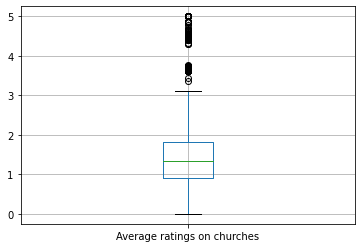

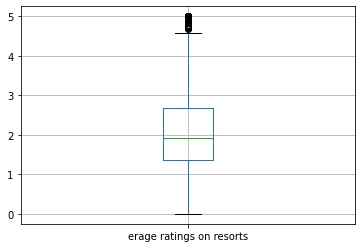

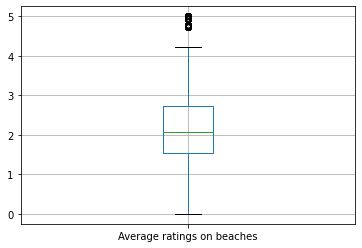

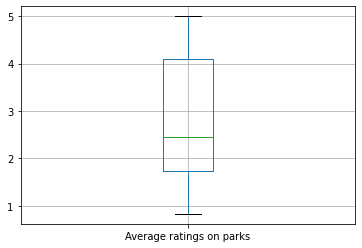

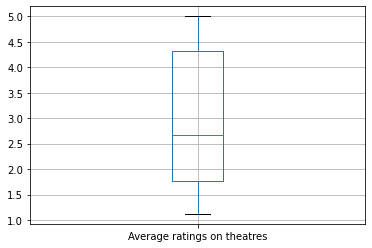

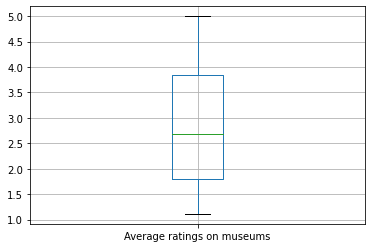

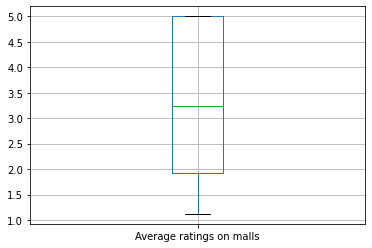

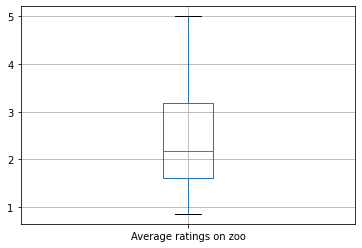

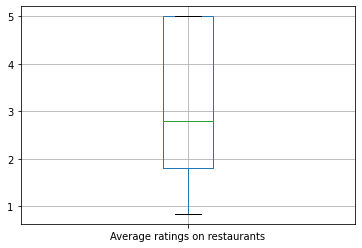

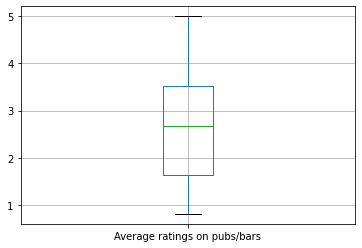

KeyError: "None of [Index(['Average ratings on local services'], dtype='object')] are in the [columns]"

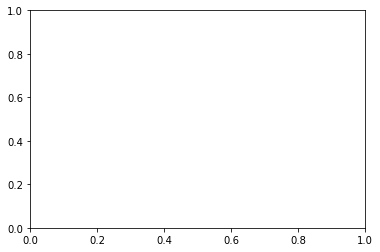

In [22]:
for column in df:
    plt.figure()
    df.boxplot([column]) # plotting the all the boxplot for finding the outliers
    plt.show()

In [23]:
# replacing the outliesre with iqr

Percentiles: 25th=0.920, 75th=1.810, IQR=0.890
Identified outliers: 197
Non-outlier observations: 5258


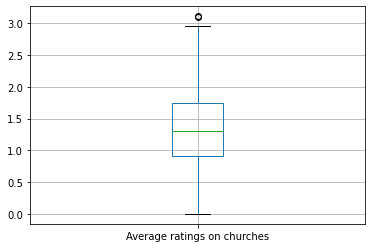

Percentiles: 25th=1.360, 75th=2.640, IQR=1.280
Identified outliers: 888
Non-outlier observations: 4370


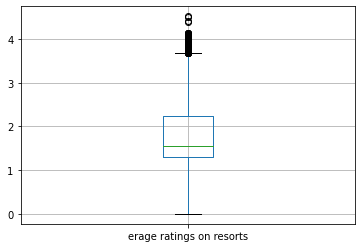

Percentiles: 25th=1.510, 75th=2.610, IQR=1.100
Identified outliers: 580
Non-outlier observations: 3790


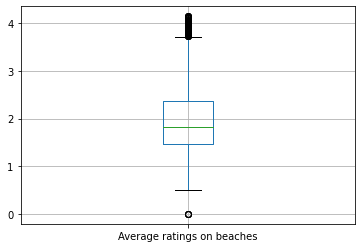

Percentiles: 25th=1.670, 75th=2.890, IQR=1.220
Identified outliers: 701
Non-outlier observations: 3089


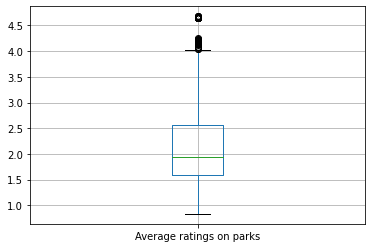

Percentiles: 25th=1.670, 75th=3.070, IQR=1.400
Identified outliers: 0
Non-outlier observations: 3089


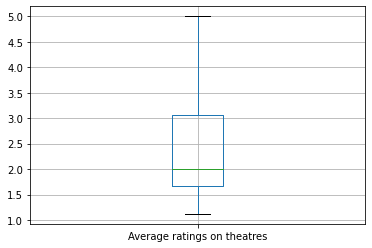

Percentiles: 25th=1.670, 75th=3.240, IQR=1.570
Identified outliers: 0
Non-outlier observations: 3089


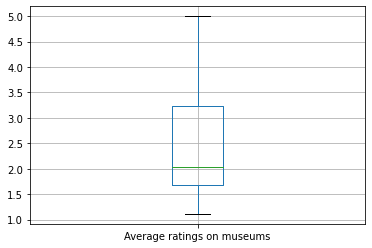

Percentiles: 25th=1.870, 75th=5.000, IQR=3.130
Identified outliers: 0
Non-outlier observations: 3089


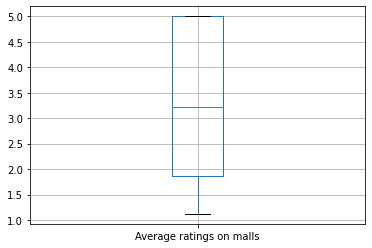

Percentiles: 25th=1.570, 75th=3.220, IQR=1.650
Identified outliers: 0
Non-outlier observations: 3089


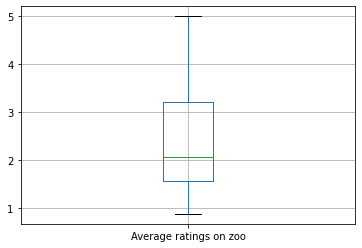

Percentiles: 25th=2.060, 75th=5.000, IQR=2.940
Identified outliers: 0
Non-outlier observations: 3089


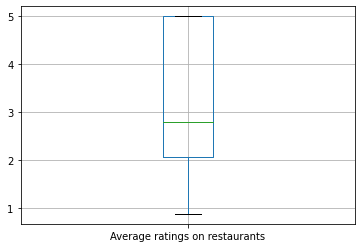

Percentiles: 25th=1.600, 75th=3.600, IQR=2.000
Identified outliers: 0
Non-outlier observations: 3089


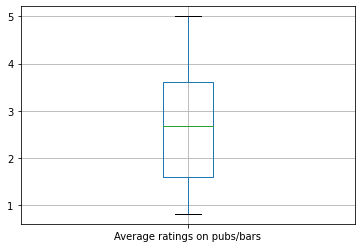

TypeError: can't multiply sequence by non-int of type 'float'

In [24]:
from numpy import percentile
for column in df.columns:
    q25, q75 = percentile(df[column], 25), percentile(df[column], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in df[column] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[column] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    df = df[df[column] < upper]
    plt.figure()
    df.boxplot([column])
    plt.show()

In [25]:
column_names = df.columns.values


In [26]:
# Creating the dataframe containg number of review for each feature
reviews = df[column_names[1:]].astype(bool).sum(axis=0).sort_values()
reviews

Average ratings on gyms                     2509
Average ratings on bakeries                 2532
Average ratings on beauty & spas            2543
Average ratings on cafes                    2660
Average ratings on viewpoints               2810
Average ratings on monuments                2833
Average ratings on swimming pools           2864
Average ratings on gardens                  2890
erage ratings on resorts                    2999
Average ratings on dance clubs              3031
Average ratings on beaches                  3085
Average ratings on local services           3089
Average ratings on burger/pizza shops       3089
Average ratings on restaurants              3089
Average ratings on juice bars               3089
Average ratings on art galleries            3089
Average ratings on zoo                      3089
Average ratings on malls                    3089
Average ratings on museums                  3089
Average ratings on theatres                 3089
Average ratings on p

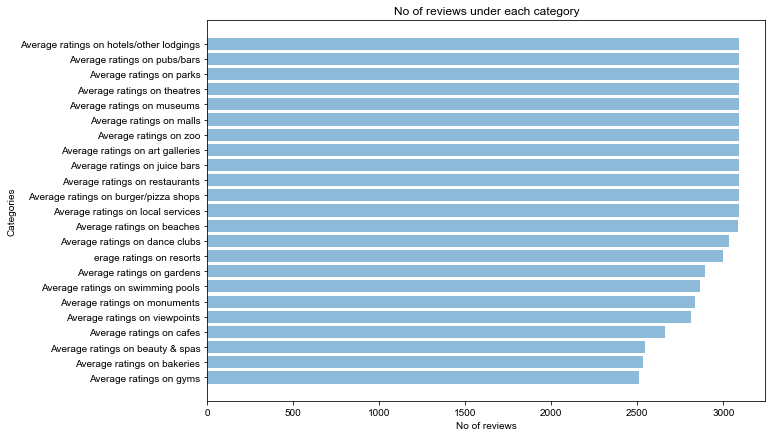

In [27]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), reviews.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), reviews.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')
sns.set()

In [28]:
# Creating a dataframe to store number of reviews by users
no_of_reviews =df[column_names[1:]].astype(bool).sum(axis=1).value_counts()
no_of_reviews

23    2065
22     271
20     229
19     183
18     117
21     106
17      94
16      20
15       4
dtype: int64

Text(0.5, 1.0, 'No of Categories vs No of reviews')

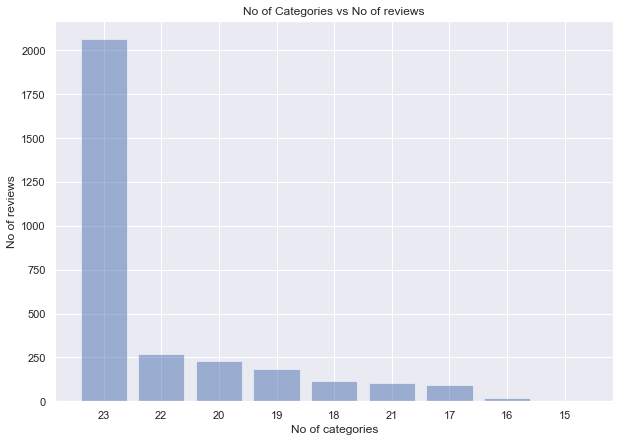

In [29]:
# Plotting the number of customers vs numbe of review
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df) # normalizing the all features
data_scaled = pd.DataFrame(data_scaled, columns=df.columns) 
data_scaled.head()

,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,0.156222,0.155303,0.156222,0.158060,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,0.155242,0.154329,0.155242,0.157068,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,0.158840,0.155167,0.156085,0.157922,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


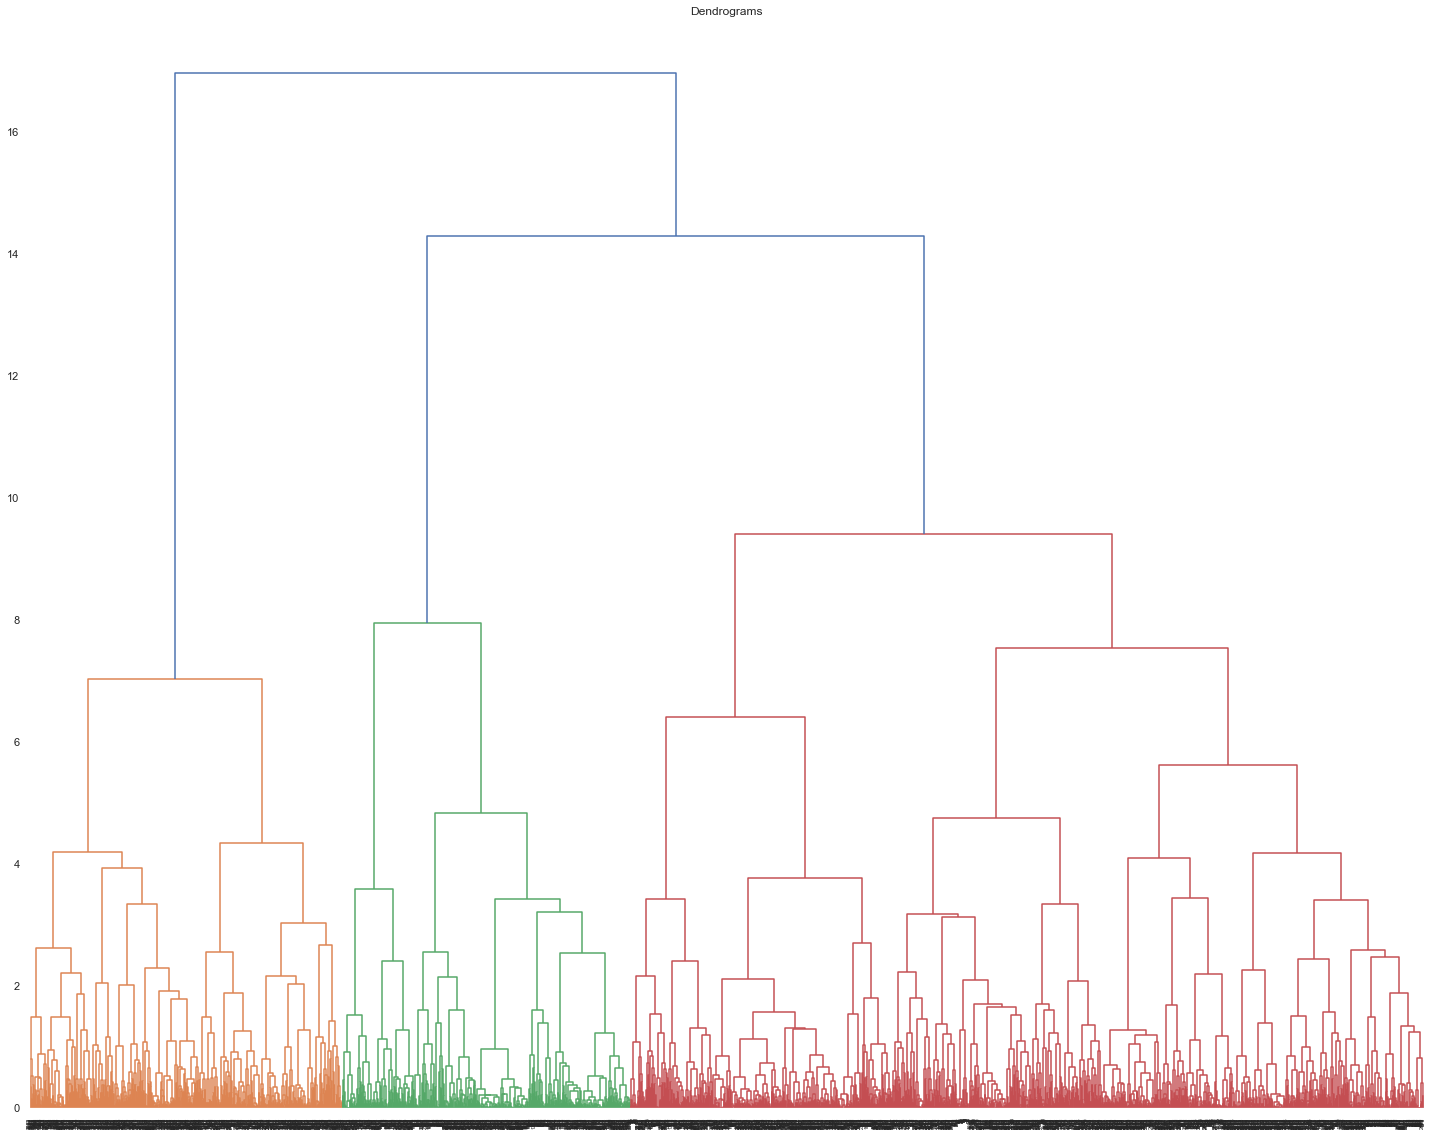

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

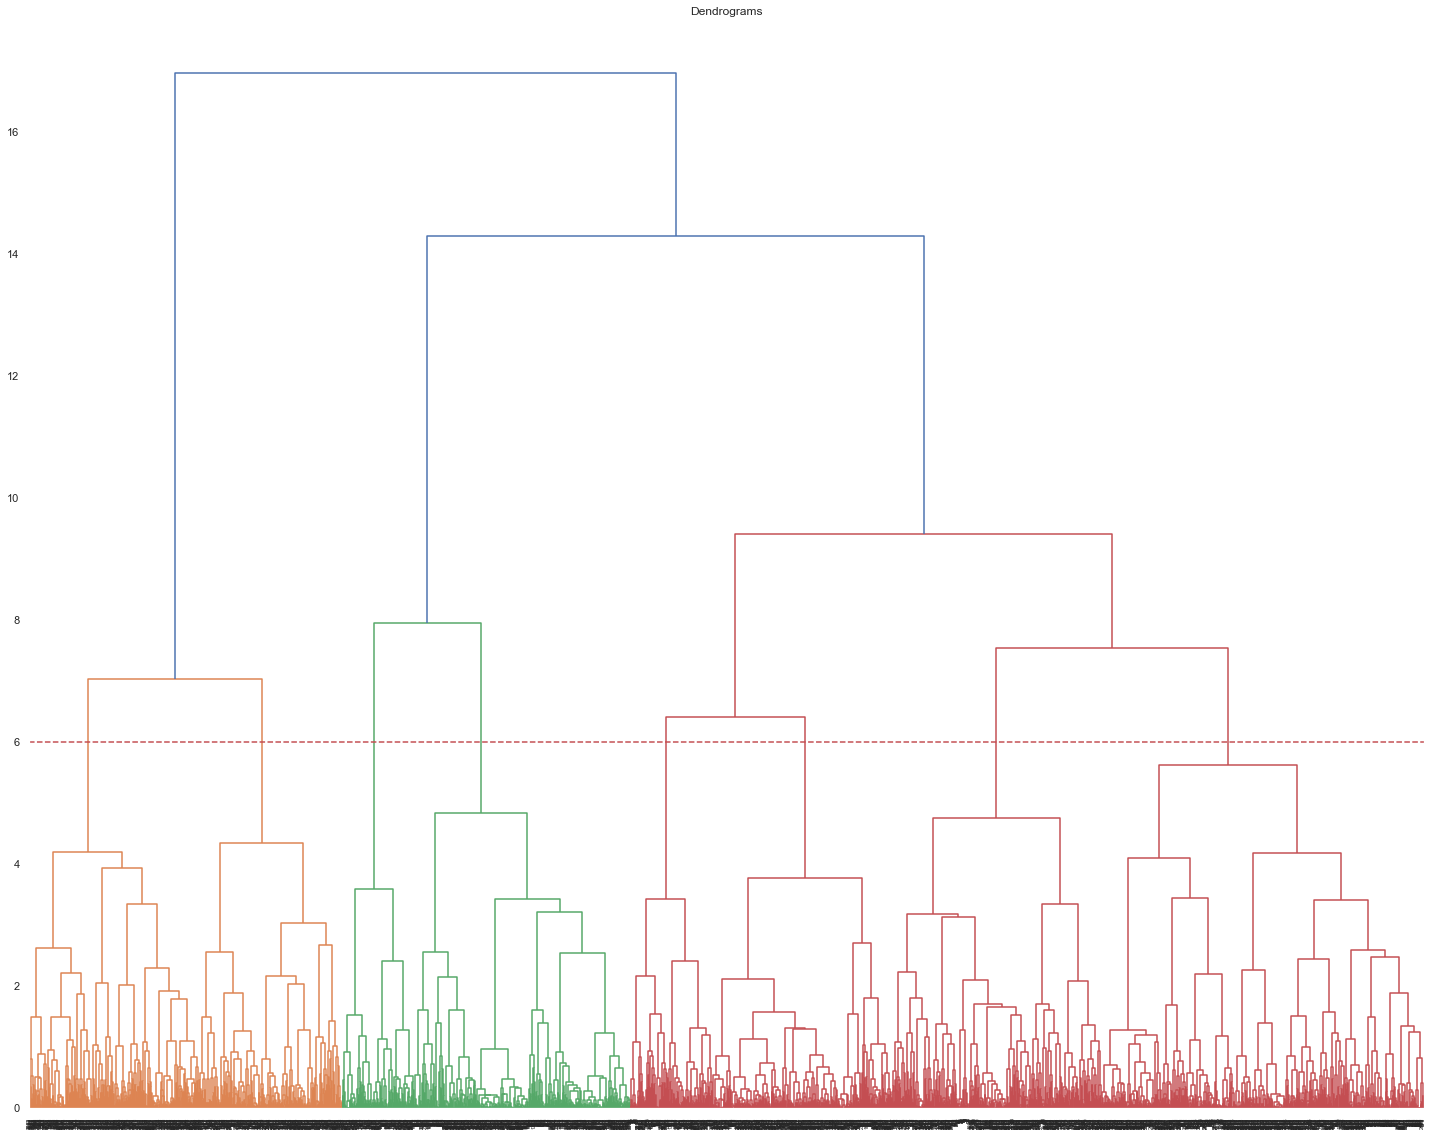

In [32]:
plt.figure(figsize=(25, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [33]:
from sklearn.cluster import AgglomerativeClustering # Importing packages

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Creating a Agglomerative Clustering
 


In [34]:
data_final = df.copy(deep = True)
data_final.head()

,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [35]:
# Fitting the model
y_cluster = cluster.fit_predict(data_final)

In [36]:
####Adding the cluster column
data_clustered = data_final.copy()



In [37]:
data_clustered["Cluster"] = y_cluster.astype('object')


In [38]:
data_clustered.head()


,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [39]:
##Visualizing the clusters


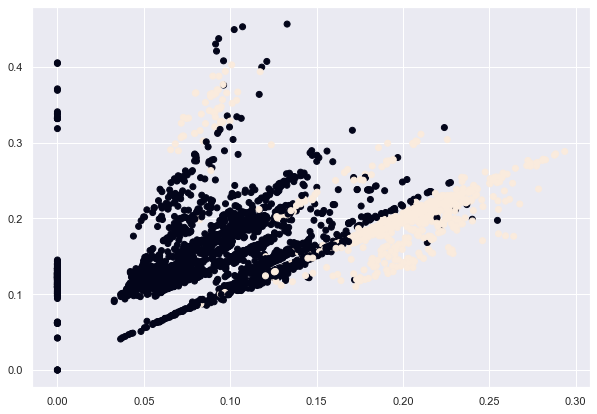

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Average ratings on churches'], data_scaled['Average ratings on beaches'], c=cluster.labels_) 

 # Conclusion

In [41]:
#By using heirarchical clustering we clustered review into two category, positive review and a negative review

In [42]:
result = data_clustered.copy()


In [43]:
result.replace({'Cluster' : 1} , 'Positive' , inplace=True)
result.replace({'Cluster' : 0} , 'Negative' , inplace= True)

In [44]:
result.head()


,Average ratings on churches,erage ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on juice bars,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on viewpoints,Average ratings on monuments,Average ratings on gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
